# **Análise Exploratória de Dados com Python**

Extraindo insights a partir de tendências e padrões identificados nos dados

## **Importação e Leitura**

In [12]:
#Instalação das bibliotecas
pip install pandas matplotlib seaborn scipy scikit-learn nltk

In [13]:
#Importação de tudo que foi usado
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [14]:
#Leitura dos arquivos CSV
df = pd.read_csv('/content/drive/MyDrive/Sleep_health_and_lifestyle_dataset.csv', encoding='latin-1')
df_stress = pd.read_csv('/content/drive/MyDrive/stress_detection_data_bruto.csv', encoding='latin-1')

df.head()
df_stress.head()

,Age,Gender,Occupation,Marital_Status,Sleep_Duration,Sleep_Quality,Wake_Up_Time,Bed_Time,Physical_Activity,Screen_Time,...,Smoking_Habit,Work_Hours,Travel_Time,Social_Interactions,Meditation_Practice,Exercise_Type,Blood_Pressure,Cholesterol_Level,Blood_Sugar_Level,Stress_Detection
0,30,Male,Software Engineer,Single,7.0,4.0,7:00 AM,10:00 PM,2.0,4.0,...,No,8,1.0,5,Yes,Cardio,120,180,90,Low
1,35,Female,Marketing Manager,Married,6.0,3.0,6:00 AM,11:00 PM,1.0,3.0,...,No,9,2.0,3,No,Yoga,110,160,80,Medium
2,40,Male,Data Scientist,Divorced,7.0,4.0,7:00 AM,10:00 PM,2.0,4.0,...,No,8,1.0,5,Yes,Strength Training,130,200,100,High
3,35,Male,Software Engineer,Single,7.0,4.0,7:00 AM,10:00 PM,2.0,4.0,...,No,8,1.0,5,Yes,Cardio,120,180,90,Low
4,29,Female,Teacher,Single,8.0,5.0,6:30 AM,10:30 PM,3.0,2.0,...,No,7,1.0,4,Yes,Yoga,110,180,90,Low


## **Limpeza e Transformação dos Dados**

In [15]:
#Substituição dos nulos por "None"
df["Sleep Disorder"] = df["Sleep Disorder"].fillna("None")

In [16]:
#Converter hora em número decimal
df_stress["hora_decimal"] = pd.to_datetime(df_stress["Bed_Time"]).dt.hour + pd.to_datetime(df_stress["Bed_Time"]).dt.minute / 60
df_stress["hora_decimal"] = df_stress["hora_decimal"].apply(lambda x: x + 24 if x < 12 else x)

/tmp/ipython-input-16-2457675614.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_stress["hora_decimal"] = pd.to_datetime(df_stress["Bed_Time"]).dt.hour + pd.to_datetime(df_stress["Bed_Time"]).dt.minute / 60
/tmp/ipython-input-16-2457675614.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_stress["hora_decimal"] = pd.to_datetime(df_stress["Bed_Time"]).dt.hour + pd.to_datetime(df_stress["Bed_Time"]).dt.minute / 60


In [17]:
#Função para faixa de horário
def faixa_horario(hora):
    if hora <= 22:
        return "Antes das 22h"
    elif hora <= 24:
        return "22h-00h"
    else:
        return "Após 00h"

df_stress["faixa_horario"] = df_stress["hora_decimal"].apply(faixa_horario)

In [18]:
#Convertendo string em int no campo "Stress_Detection"
mapa_estresse = {
    "Low": 1,
    "Medium": 2,
    "High": 3
}

df_stress["Stress_Detection_numeric"] = df_stress["Stress_Detection"].map(mapa_estresse)

## **Gráficos**

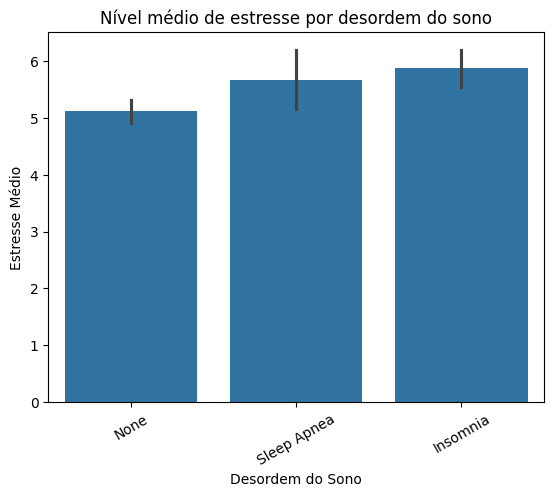

In [19]:
#Gráfico de barra medindo nível médio de estresse por desordem do sono
sns.barplot(data=df, x="Sleep Disorder", y="Stress Level", estimator="mean")
plt.title("Nível médio de estresse por desordem do sono")
plt.xlabel("Desordem do Sono")
plt.ylabel("Estresse Médio")
plt.xticks(rotation=30)
plt.show()

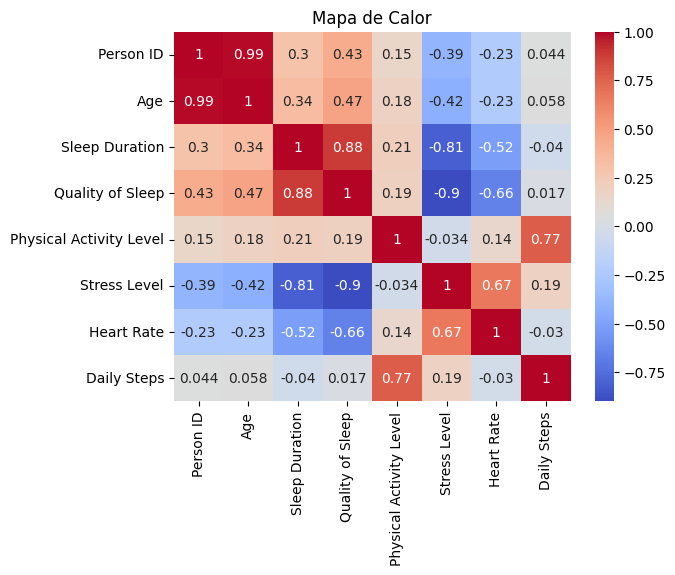

In [20]:
#Mapa de calor para correlacionar os dados
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Mapa de Calor")
plt.show()

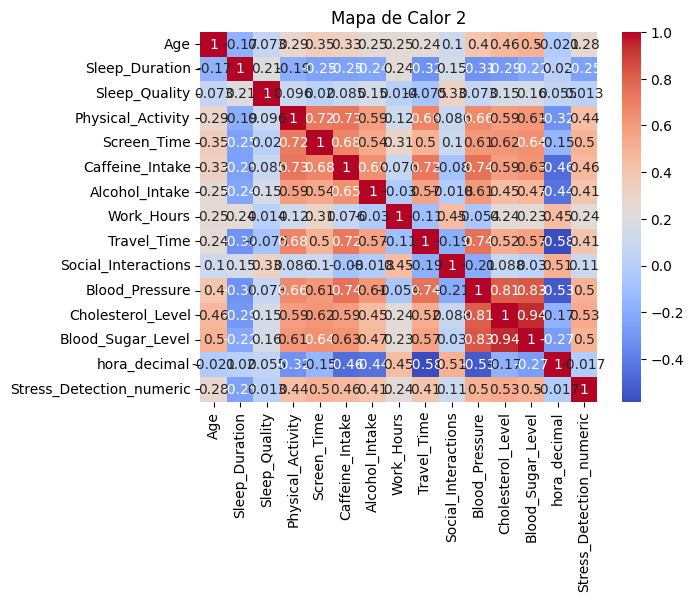

In [21]:
#Mapa de calor do segundo dataframe
sns.heatmap(df_stress.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Mapa de Calor 2")
plt.show()

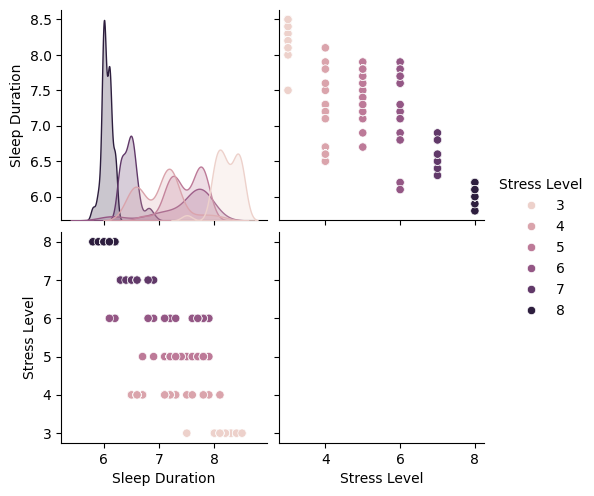

In [22]:
#Gráfico de dispersão comparando nível de estresse e duração de sono
sns.pairplot(data=df, vars=["Sleep Duration", "Stress Level"], hue="Stress Level")
plt.show()

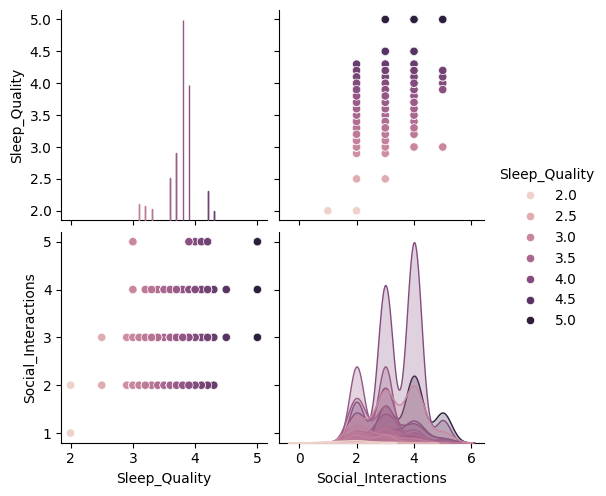

In [24]:
#Gráfico de dispersão comparando qualidade de sono e interação social
sns.pairplot(data=df_stress, vars=["Sleep_Quality", "Social_Interactions"], hue="Sleep_Quality")
plt.show()

## **Estatística**

In [25]:
#Regressão linear para teste de relação de duração de sono com nível de estresse
modelo = LinearRegression()
X = df[["Sleep Duration"]]
y = df["Stress Level"]

modelo.fit(X, y)

print(f"Coeficiente: {modelo.coef_[0]:.2f}, Intercepto: {modelo.intercept_:.2f}")

Coeficiente: -1.81, Intercepto: 18.29


In [26]:
#Confirmação da regressão linear
y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)
print(f"R²: {r2:.2f}")

R²: 0.66


In [27]:
#Valor p da hora de dormir com o nível de estresse
grupo1 = df_stress[df_stress["faixa_horario"] == "Antes das 22h"]["Stress_Detection_numeric"]
grupo2 = df_stress[df_stress["faixa_horario"] == "Após 00h"]["Stress_Detection_numeric"]

t_stat, p_valor = ttest_ind(grupo1, grupo2)
print(f"p-valor: {p_valor:.4f}")

p-valor: 0.7893


## **Exportação**

In [30]:
#Exportação da média de estresse por faixa de horário em CSV
df_summary = df_stress.groupby("faixa_horario")["Stress_Detection_numeric"].mean().reset_index()

df_summary.to_csv("resumo_estresse.csv", index=False)